# Lecture 3: Optimize, print and plot

[Download on GitHub](https://github.com/NumEconCopenhagen/lectures-2019)

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/lectures-2019/master?urlpath=lab/tree/03/Optimize_print_and_plot.ipynb)

1. [The consumer problem](#The-consumer-problem)
2. [Numerical python (numpy)](#Numerical-python-(numpy))
3. [Utility function](#Utility-function)
4. [Algorithm 1: Simple loops](#Algorithm-1:-Simple-loops)
5. [Algorithm 2: Use monotonicity](#Algorithm-2:-Use-monotonicity)
6. [Algorithm 3: Call a solver](#Algorithm-3:-Call-a-solver)
7. [Indifference curves](#Indifference-curves)
8. [A classy solution](#A-classy-solution)
9. [Summary](#Summary)


You will learn how to work with numerical data (**numpy**) and solve simple numerical optimization problems (**scipy.optimize**) and report the results both in text (**print**) and in figures (**matplotlib**).

**Links:**:

- **print**: [examples](https://www.python-course.eu/python3_formatted_output.php) (very detailed)
- **numpy**: [detailed tutorial](https://www.python-course.eu/numpy.php)
- **matplotlib**: [examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py), [documentation](https://matplotlib.org/users/index.html), [styles](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)
- **scipy-optimize**: [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html)

<a id="The-consumer-problem"></a>

# 1. The consumer problem

Consider the following 2-good consumer problem with 

* utility function $u(x_1,x_2):\mathbb{R}^2_{+}\rightarrow\mathbb{R}$,
* exogenous income $I$, and 
* price-vector $(p_1,p_2)$,

given by

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1},x_{2}}u(x_{1},x_{2})\\
 \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Specific example:** Let the utility function be Cobb-Douglas,

$$
u(x_1,x_2) = x_1^{\alpha}x_2^{1-\alpha}
$$

We then know the solution is given by

$$
\begin{aligned}
x_1^{\ast} &= \alpha \frac{I}{p_1} \\
x_2^{\ast} &= (1-\alpha) \frac{I}{p_2}
\end{aligned}
$$

which implies that $\alpha$ is the budget share of the first good and $1-\alpha$ is the budget share of the second good.

<a id="Numerical-python-(numpy)"></a>

# 2. Numerical python (numpy)

In [1]:
import numpy as np # import the numpy module

A **numpy array** is like a list, but with two important differences:

1. Elements must be of **one homogenous type**
2. A **slice returns a view** rather than extract content

## 2.1 Basics

Numpy arrays can be **created from lists** and can be **multi-dimensional**:

In [2]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # one dimension
B = np.array([[3.4, 8.7, 9.9], 
              [1.1, -7.8, -0.7],
              [4.1, 12.3, 4.8]]) # two dimensions

print(type(A),type(B)) # type
print(A.dtype,B.dtype) # data type
print(A.ndim,B.ndim) # dimensions
print(A.shape,B.shape) # shape (1d: (columns,), 2d: (row,columns))
print(A.size,B.size) # size

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
int32 float64
1 2
(10,) (3, 3)
10 9


**Slicing** a numpy array returns a **view**:

In [3]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
B = A.copy() # a copy of A
C = A[2:6] # a view into A
C[0] = 0
C[1] = 0
print(A) # changed
print(B) # not changed

[0 1 0 0 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Numpy array can also be created using numpy functions:

In [4]:
print(np.ones((2,3)))
print(np.zeros((4,2)))
print(np.linspace(0,1,6)) # linear spacing

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[0.  0.2 0.4 0.6 0.8 1. ]


**Tip 1:** Try pressing <kbd>Shift</kbd>+<kbd>Tab</kbd> inside a function.<br>

**Tip 2:** Try to write `?np.linspace` in a cell

In [5]:
?np.linspace

Signature: np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

Parameters
----------
start : scalar
    The starting value of the sequence.
stop : scalar
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is False.
num : int, optional
    Number of samples to generate. Default is 50. Must be non-negative.
endpoint : bool, optional
    If True, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
retstep : bool, optional
    If True, return (`samples`, `step`), where `step` is the spacing
    between samples.
dtype : dtype, optional

## 2.2 Math

Standard **mathematical operations** can be applied:

In [6]:
A = np.array([[1,0],[0,1]])
B = np.array([[2,2],[2,2]])
print(A+B)
print(A-B)
print(A*B) # element-by-element product
print(A/B) # element-by-element division
print(A@B) # matrix product

[[3 2]
 [2 3]]
[[-1 -2]
 [-2 -1]]
[[2 0]
 [0 2]]
[[0.5 0. ]
 [0.  0.5]]
[[2 2]
 [2 2]]


If arrays does not fit together **broadcasting** is applied. Here is an example with multiplication:

In [7]:
A = np.array([ [10, 20, 30], [40, 50, 60] ]) # shape = (2,3) 
B = np.array([1, 2, 3]) # shape = (3,) = (1,3)
C = np.array([[1],[2]]) # shape = (2,1)

print(A)
print(A*B) # every row is multiplied by B
print(A*C) # every column is multiplied by C

[[10 20 30]
 [40 50 60]]
[[ 10  40  90]
 [ 40 100 180]]
[[ 10  20  30]
 [ 80 100 120]]


**General rule:** Numpy arrays can be added/substracted/multiplied/divided if they in all dimensions have the same size or one of them has a size of one. If the numpy arrays differ in number of dimensions, this only has to be true for the (inner) dimensions they share. 

**More on broadcasting:** [Documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

A lot of **mathematical procedures** can easily be performed on numpy arrays.

In [8]:
A =  np.array([3.1, 2.3, 9.1, -2.5, 12.1])
print(np.min(A)) # find minimum
print(np.argmin(A)) # find index for minimum
print(np.mean(A)) # calculate mean
print(np.sort(A)) # sort (ascending)

-2.5
3
4.82
[-2.5  2.3  3.1  9.1 12.1]


**Note:** Sometimes a method can be used instead of a function, e.g. ``A.mean()``. Personally, I typically stick to functions because that always works. 

## 2.3 Indexing

**Multi-dimensional** indexing is done as:

In [9]:
X = np.array([ [11, 12, 13], [21, 22, 23] ])
print(X)
print(X[0,0]) # first row, first column
print(X[0,1]) # first row, second column
print(X[1,2]) # second row, third column

[[11 12 13]
 [21 22 23]]
11
12
23


In [10]:
X[0]

array([11, 12, 13])

Indexes can be **logical**. Logical 'and' is `&` and logical 'or' is `|`.

In [11]:
A = np.array([1,2,3,4,1,2,3,4])
B = np.array([3,3,3,3,2,2,2,2])
I = (A < 3) & (B == 3) # note & instead of 'and'
print(type(I),I.dtype)
print(I)
print(A[I])

<class 'numpy.ndarray'> bool
[ True  True False False False False False False]
[1 2]


In [12]:
I = (A < 3) | (B == 3) # note | instead of 'or'
print(A[I])

[1 2 3 4 1 2]


## 2.4 List of good things to know

**Attributes and methods** to know:

- size / ndim / shape
- ravel / reshape / sort
- copy

**Functions** to know:

- array / empty / zeros / ones / linspace
- mean / median / std / var / sum / percentile
- min/max, argmin/argmax / fmin / fmax / sort / clip
- meshgrid / hstack / vstack / concatenate / tile / insert
- allclose / isnan / isinf / isfinite / any / all

**Concepts** to know:

- view vs. copy
- broadcasting
- logical indexing

**Question:** Consider the following code:

In [13]:
A = np.array([1,2,3,4,5])
B = A[3:]
B[:] = 0

What is `np.sum(A)` equal to?
- **A:** 15
- **B:** 10
- **C:** 6
- **D:** 0
- **E:** Don't know

## 2.5 Extra: Memory

Memory is structured in **rows**:

In [14]:
A = np.array([[3.1,4.2],[5.7,9.3]])
B = A.ravel() # one-dimensional view of A
print(A.shape,A[0,:])
print(B.shape,B)

(2, 2) [3.1 4.2]
(4,) [3.1 4.2 5.7 9.3]


<a id="Utility-function"></a>

# 3. Utility function

Define the utility function:

In [15]:
def u_func(x1,x2,alpha=0.50):
    return x1**alpha*x2**(1-alpha)

# x1,x2 are positional arguments
# alpha is a keyword argument with default value 0.50

## 3.1 Print to screen

Print a **single evaluation** of the utility function.

In [16]:
x1 = 1
x2 = 3
u = u_func(x1,x2)

# f'text' is called a "formatted string"
# {x1:.3f} prints variable x1 as floating point number with 3 decimals

print(f'x1 = {x1:.3f}, x2 = {x2:.3f} -> u = {u:.3f}') 

x1 = 1.000, x2 = 3.000 -> u = 1.732


In [17]:
print(u)

1.7320508075688772


Print **multiple evaluations** of the utility function.

In [18]:
x1_list = [2,4,6,8,10,12]
x2 = 3

for x1 in x1_list: # loop through each element in x1_list
    u = u_func(x1,x2,alpha=0.25)
    print(f'x1 = {x1:.3f}, x2 = {x2:.3f} -> u = {u:.3f}')

x1 = 2.000, x2 = 3.000 -> u = 2.711
x1 = 4.000, x2 = 3.000 -> u = 3.224
x1 = 6.000, x2 = 3.000 -> u = 3.568
x1 = 8.000, x2 = 3.000 -> u = 3.834
x1 = 10.000, x2 = 3.000 -> u = 4.054
x1 = 12.000, x2 = 3.000 -> u = 4.243


And a little nicer...

In [19]:
for i,x1 in enumerate(x1_list): # i is a counter
    u = u_func(x1,x2,alpha=0.25)
    print(f'{i:2d}: x1 = {x1:<6.3f} x2 = {x2:<6.3f} -> u = {u:<6.3f}')
    
# {i:2d}: integer a width of 2 (right-aligned)
# {x1:<6.3f}: float width of 6 and 3 decimals (<, left-aligned)

 0: x1 = 2.000  x2 = 3.000  -> u = 2.711 
 1: x1 = 4.000  x2 = 3.000  -> u = 3.224 
 2: x1 = 6.000  x2 = 3.000  -> u = 3.568 
 3: x1 = 8.000  x2 = 3.000  -> u = 3.834 
 4: x1 = 10.000 x2 = 3.000  -> u = 4.054 
 5: x1 = 12.000 x2 = 3.000  -> u = 4.243 


**Task**: Write a loop printing the results shown in the answer below.

In [20]:
# write your code here

**Answer:**

In [21]:
for i,x1 in enumerate(x1_list): # i is a counter
    u = u_func(x1,x2,alpha=0.25)
    print(f'{i:2d}: u({x1:.2f},{x1:.2f}) = {u:.4f}')

 0: u(2.00,2.00) = 2.7108
 1: u(4.00,4.00) = 3.2237
 2: u(6.00,6.00) = 3.5676
 3: u(8.00,8.00) = 3.8337
 4: u(10.00,10.00) = 4.0536
 5: u(12.00,12.00) = 4.2426


**More formatting options?** See these [examples](https://www.python-course.eu/python3_formatted_output.php).

## 3.2 Print to file

Open a text-file and write lines in it:

In [22]:
with open('somefile.txt', 'w') as the_file: # 'w' is for 'write'
    
    for i, x1 in enumerate(x1_list):
        u = u_func(x1,x2,alpha=0.25)
        text = f'{i+10:2d}: x1 = {x1:<6.3f} x2 = {x2:<6.3f} -> u = {u:<6.3f}'
        the_file.write(text + '\n') # \n gives a lineshift

# note: the with clause ensures that the file is properly closed afterwards

Open a text-file and read the lines in it and then print them:

In [23]:
with open('somefile.txt', 'r') as the_file: # 'r' is for 'read'
    
    lines = the_file.readlines()
    for line in lines:
        print(line,end='') # end='' removes the extra lineshift print creates

10: x1 = 2.000  x2 = 3.000  -> u = 2.711 
11: x1 = 4.000  x2 = 3.000  -> u = 3.224 
12: x1 = 6.000  x2 = 3.000  -> u = 3.568 
13: x1 = 8.000  x2 = 3.000  -> u = 3.834 
14: x1 = 10.000 x2 = 3.000  -> u = 4.054 
15: x1 = 12.000 x2 = 3.000  -> u = 4.243 


> **Note:** You could also write tables in LaTeX format and the import them in your LaTeX document.

## 3.3 Calculate the utility function on a grid

**Calculate the utility function** on a 2-dimensional grid with $N$ elements in each dimension:

In [24]:
# a. settings
N = 100 # number of elements
x_max = 10 # maximum value

# b. allocate numpy arrays
shape_tuple = (N,N)
x1_values = np.empty(shape_tuple) # allocate 2d numpy array with shape=(N,N)
x2_values = np.empty(shape_tuple)
u_values = np.empty(shape_tuple)

# c. fill numpy arrays
for i in range(N): # 0,1,...,N-1
    for j in range(N): # 0,1,...,N-1
        x1_values[i,j] = (i/(N-1))*x_max # in [0,x_max]
        x2_values[i,j] = (j/(N-1))*x_max # in [0,x_max]
        u_values[i,j] = u_func(x1_values[i,j],x2_values[i,j],alpha=0.25)

**Alternatively:** Use internal numpy functions:

In [25]:
x_vec = np.linspace(0,x_max,N)
x1_values_alt,x2_values_alt = np.meshgrid(x_vec,x_vec,indexing='ij')
u_values_alt = u_func(x1_values_alt,x2_values_alt,alpha=0.25)

Test whether the results are the same:

In [26]:
# a. maximum absolute difference
max_abs_diff = np.max(np.abs(u_values-u_values_alt))
print(max_abs_diff) # very close to zero     

# b. test if all values are "close"
print(np.allclose(u_values,u_values_alt))

2.6645352591003757e-15
True


**Note:** The results are not exactly the same due to floating point arithmetics.

## 3.4 Plot the utility function

Import modules and state that the figures should be inlined:

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid') # whitegrid nice with 3d

Construct the actual plot:

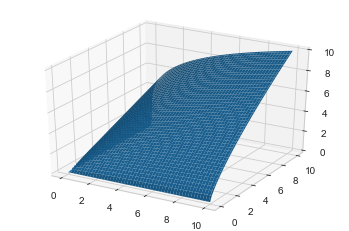

In [28]:
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d axis in the figure 
ax.plot_surface(x1_values,x2_values,u_values); # create surface plot in the axis

# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

Make the figure **zoomable** and **panable** using a widget:

FigureCanvasNbAgg()

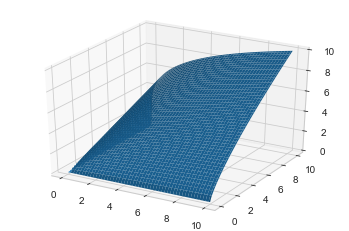

In [29]:
%matplotlib widget
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d axis in the figure 
ax.plot_surface(x1_values,x2_values,u_values); # create surface plot in the axis

Turn back to normal inlining:

In [30]:
%matplotlib inline

**Extensions**: Use a colormap, make it pretier, and save to disc.

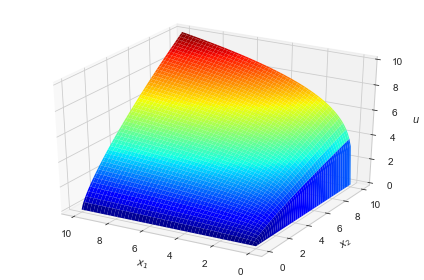

In [31]:
from matplotlib import cm # for colormaps

# a. actual plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# c. invert xaxis
ax.invert_xaxis()

# d. save
fig.tight_layout()
fig.savefig('someplot.pdf') # or e.g. .png 

**More formatting options?** See these [examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py).

**Task**: Construct the following plot:

![wireframeplot](https://github.com/NumEconCopenhagen/lectures-2019/raw/master/03/someplot_wireframe.png)

**Answer:**

In [32]:
# write your code here

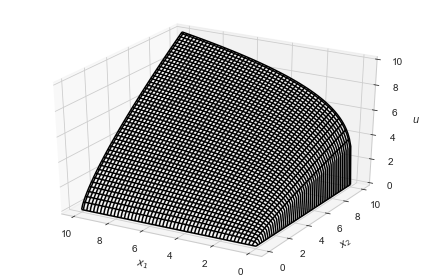

In [33]:
# a. actual plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(x1_values,x2_values,u_values,edgecolor='black')

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# c. invert xaxis
ax.invert_xaxis()

# e. save
fig.tight_layout()
fig.savefig('someplot_wireframe.png')
fig.savefig('someplot_wireframe.pdf')

## 3.5 Summary

We have talked about:

1. Print (to screen and file)
2. Figures (matplotlib)

**Other plotting libraries:** [seaborn](https://seaborn.pydata.org/) and [bokeh](https://bokeh.pydata.org/en/latest/).

<a id="Algorithm-1:-Simple-loops"></a>

# 4. Algorithm 1: Simple loops

Remember the problem we wanted to solve:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1},x_{2}}u(x_{1},x_{2})\\
 & \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Idea:** Loop through a grid of $N_1 \times N_2$ possible solutions. This is the same as solving:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1}\in X_1,x_{2} \in X_2} x_1^{\alpha}x_2^{1-\alpha}\\
 & \text{s.t.}\\
 X_1 & = \left\{0,\frac{1}{N_1-1}\frac{I}{p_1},\frac{2}{N_1-1}\frac{I}{p_1},\dots,\frac{I}{p_1}\right\} \\
 X_2 & = \left\{0,\frac{1}{N_2-1}\frac{I}{p_2},\frac{2}{N_2-1}\frac{ I}{p_2},\dots,\frac{ I}{p_2}\right\} \\
p_{1}x_{1}+p_{2}x_{2} & \leq I\\
\end{aligned}
$$

Function doing just this:

In [34]:
def find_best_choice(alpha,I,p1,p2,N1,N2,do_print=True):
    
    # a. allocate numpy arrays
    shape_tuple = (N1,N2)
    x1_values = np.empty(shape_tuple)
    x2_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # b. start from guess of x1=x2=0
    x1_best = 0
    x2_best = 0
    u_best = u_func(0,0,alpha=alpha)
    
    # c. loop through all possibilities
    for i in range(N1):
        for j in range(N2):
            
            # i. x1 and x2 (chained assignment)
            x1_values[i,j] = x1 = (i/(N1-1))*I/p1
            x2_values[i,j] = x2 = (j/(N2-1))*I/p2
            
            # ii. utility
            if p1*x1+p2*x2 <= I: # u(x1,x2) if expenditures <= income 
                u_values[i,j] = u_func(x1,x2,alpha=alpha)
            else: # u(0,0) if expenditures > income
                u_values[i,j] = u_func(0,0,alpha=alpha)
            
            # iii. check if best sofar
            if u_values[i,j] > u_best:
                x1_best = x1_values[i,j]
                x2_best = x2_values[i,j] 
                u_best = u_values[i,j]
    
    # d. print
    if do_print:
        print_solution(x1_best,x2_best,u_best,I,p1,p2)

    return x1_best,x2_best,u_best,x1_values,x2_values,u_values

# function for printing the solution
def print_solution(x1,x2,u,I,p1,p2):
    print(f'x1 = {x1:.8f}')
    print(f'x2 = {x2:.8f}')
    print(f'u  = {u:.8f}')
    print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.8f}') 

Call the function:

In [35]:
sol = find_best_choice(alpha=0.25,I=20,p1=1,p2=2,N1=500,N2=400)

x1 = 5.01002004
x2 = 7.49373434
u  = 6.77615896
I-p1*x1-p2*x2 = 0.00251129


Plot the solution:

FigureCanvasNbAgg()

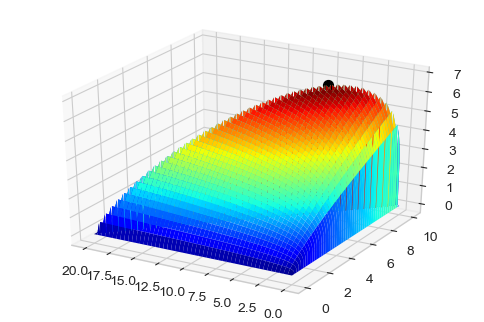

In [36]:
%matplotlib widget

# a. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol

# b. setup figure
fig = plt.figure(dpi=100,num='')
ax = fig.add_subplot(1,1,1,projection='3d')

# c. plot 3d surface of utility values for different choices
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)
ax.invert_xaxis()

# d. plot optimal choice
ax.scatter(x1_best,x2_best,u_best,s=50,color='black');

In [37]:
%matplotlib inline

**Task**: Can you find a better solution with higher utility and lower left-over income, $I-p_1 x_1-p_2 x_2$?

In [38]:
# write your code here
# sol = find_best_choice()

**Answer:**

In [39]:
sol = find_best_choice(alpha=0.25,I=10,p1=1,p2=2,N1=1000,N2=1000)

x1 = 2.50250250
x2 = 3.74874875
u  = 3.38850695
I-p1*x1-p2*x2 = 0.00000000


<a id="Algorithm-2:-Use-monotonicity"></a>

# 5. Algorithm 2: Use monotonicity

**Idea:** Loop through a grid of $N$ possible solutions for $x_1$ and assume the remainder is spent on $x_2$. This is the same as solving:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1}\in X_1} x_1^{\alpha}x_2^{1-\alpha}\\
 \text{s.t.}\\
 X_1 & = \left\{0,\frac{1}{N-1}\frac{}{p_1},\frac{2}{N-1}\frac{I}{p_1},\dots,\frac{I}{p_1}\right\} \\
x_{2} & = \frac{I-p_{1}x_{1}}{p_2}\\
\end{aligned}
$$

Function doing just this:

In [40]:
def find_best_choice_monotone(alpha,I,p1,p2,N,do_print=True):
    
    # a. allocate numpy arrays
    shape_tuple = (N)
    x1_values = np.empty(shape_tuple)
    x2_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # b. start from guess of x1=x2=0
    x1_best = 0
    x2_best = 0
    u_best = u_func(0,0,alpha)
    
    # c. loop through all possibilities
    for i in range(N):
        
        # i. x1
        x1_values[i] = x1 = i/(N-1)*I/p1
        
        # ii. implied x2
        x2_values[i] = x2 = (I-p1*x1)/p2
            
        # iii. utility    
        u_values[i] = u_func(x1,x2,alpha)
        
        if u_values[i] >= u_best:    
            x1_best = x1_values[i]
            x2_best = x2_values[i] 
            u_best = u_values[i]
            
    # d. print
    if do_print:
        print_solution(x1_best,x2_best,u_best,I,p1,p2)   

    return x1_best,x2_best,u_best,x1_values,x2_values,u_values

In [41]:
sol_monotone = find_best_choice_monotone(alpha=0.25,I=10,p1=1,p2=2,N=1000) 

x1 = 2.50250250
x2 = 3.74874875
u  = 3.38850695
I-p1*x1-p2*x2 = 0.00000000


Plot the solution:

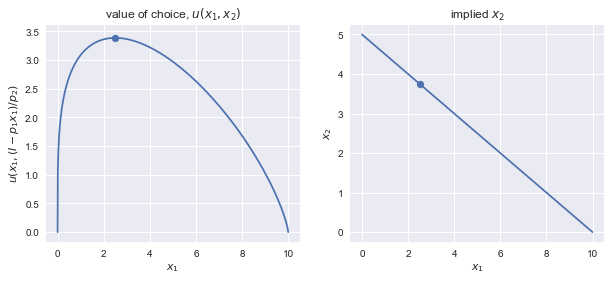

In [42]:
plt.style.use("seaborn")

# a. create the figure
fig = plt.figure(figsize=(10,4))# figsize is in inches...

# b. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol_monotone

# c. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(x1_values,u_values)
ax_left.scatter(x1_best,u_best)

ax_left.set_title('value of choice, $u(x_1,x_2)$')
ax_left.set_xlabel('$x_1$')
ax_left.set_ylabel('$u(x_1,(I-p_1 x_1)/p_2)$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(x1_values,x2_values)
ax_right.scatter(x1_best,x2_best)

ax_right.set_title('implied $x_2$')
ax_right.set_xlabel('$x_1$')
ax_right.set_ylabel('$x_2$')
ax_right.grid(True)

<a id="Algorithm-3:-Call-a-solver"></a>

# 6. Algorithm 3: Call a solver


In [43]:
from scipy import optimize

Choose paramters:

In [44]:
alpha = 0.25 # preference parameter
I = 10 # income
p1 = 1 # price 1
p2 = 2 # price 2

**Case 1**: Scalar solver using monotonicity.

In [45]:
# a. objective funciton (to minimize)
def value_of_choice(x1,alpha,I,p1,p2):
    x2 = (I-p1*x1)/p2
    return -u_func(x1,x2,alpha)

# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,I/p1),args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case1.x
x2 = (I-p1*x1)/p2
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.50000006
x2 = 3.74999997
u  = 3.38850751
I-p1*x1-p2*x2 = 0.00000000


**Case 2**: Multi-dimensional constrained solver.

In [46]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    # note: x is a vector
    x1 = x[0]
    x2 = x[1]
    return -u_func(x1,x2,alpha)

# b. constraints (violated if negative) and bounds
constraints = ({'type': 'ineq', 'fun': lambda x:  I-p1*x[0]-p2*x[1]})
bounds = ((0,I/p1),(0,I/p2))

# c. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case2 = optimize.minimize(
    value_of_choice,initial_guess,args=(alpha,I,p1,p2),
    method='SLSQP',bounds=bounds,constraints=constraints)

# d. unpack solution
x1 = sol_case2.x[0]
x2 = sol_case2.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.49937952
x2 = 3.75031024
u  = 3.38850748
I-p1*x1-p2*x2 = 0.00000000


**Case 3**: Multi-dimensional unconstrained solver with constrains implemented via penalties.

In [47]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    
    # i. unpack
    x1 = x[0]
    x2 = x[1]
    
    # ii. penalty
    penalty = 0
    E = p1*x1+p2*x2 # total expenses
    if E > I: # expenses > income -> not allowed
        fac = I/E
        penalty += 1000*(E-I) # calculate penalty        
        x1 *= fac # force E = I
        x2 *= fac # force E = I
        
    return -u_func(x1,x2,alpha)

# b. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case3 = optimize.minimize(
    value_of_choice,initial_guess,method='Nelder-Mead',
    args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case3.x[0]
x2 = sol_case3.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.58573053
x2 = 3.87859581
u  = 3.50470694
I-p1*x1-p2*x2 = -0.34292214


**Task:** Find the error in the code in the previous cell.

In [48]:
# write your code here

**Answer:**

In [49]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    
    # i. unpack
    x1 = x[0]
    x2 = x[1]
    
    # ii. penalty
    penalty = 0
    E = p1*x1+p2*x2 # total expenses
    if E > I: # expenses > income -> not allowed
        fac = I/E
        penalty += 1000*(E-I) # calculate penalty        
        x1 *= fac # force E = I
        x2 *= fac # force E = I
        
    return -u_func(x1,x2,alpha) + penalty # the error

# b. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case3 = optimize.minimize(
    value_of_choice,initial_guess,method='Nelder-Mead',
    args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case3.x[0]
x2 = sol_case3.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.49995337
x2 = 3.75002332
u  = 3.38850751
I-p1*x1-p2*x2 = 0.00000000


<a id="Indifference-curves"></a>

# 7. Indifference curves

Remember that the indifference curve through the point $(y_1,y_2)$ is given by

$$
\big\{(x_1,x_2) \in \mathbb{R}^2_+ \,|\, u(x_1,x_2) = u(y_1,y_2)\big\}
$$

To find the indifference curve, we can fix a grid for $x_2$, and then find the corresponding $x_1$ which solves $u(x_1,x_2) = u(y_1,y_2)$ for each value of $x_2$.

In [50]:
def objective(x1,x2,alpha,u):
    return u_func(x1,x2,alpha)-u 
    # = 0 then on indifference curve with utility = u

def find_indifference_curve(y1,y2,alpha,N,x2_max):
    
    # a. utiltty in (y1,y2)
    u_y1y2 = u_func(y1,y2,alpha)
    
    # b. allocate numpy arrays
    x1_vec = np.empty(N)
    x2_vec = np.linspace(1e-8,x2_max,N)
    
    # c. loop through x2
    for i,x2 in enumerate(x2_vec):

        x1_guess = 0 # initial guess
        sol = optimize.root(objective, x1_guess, args=(x2,alpha,u_y1y2)) 
        # optimize.root -> solve objective = 0 starting from x1 = x1_guess
        
        x1_vec[i] = sol.x[0]
    
    return x1_vec,x2_vec

Find and plot an inddifference curve:

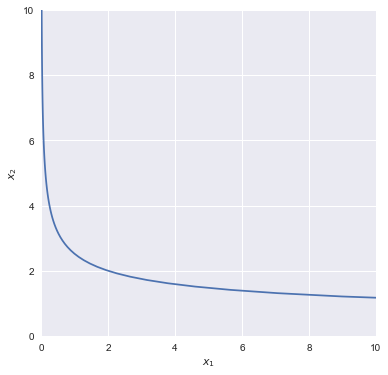

In [51]:
# a. find indifference curve through (2,2) for x2 in [0,10]
x2_max = 10
x1_vec,x2_vec = find_indifference_curve(y1=2,y2=2,alpha=0.25,N=100,x2_max=x2_max) 

# b. plot inddifference curve
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.plot(x1_vec,x2_vec)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x2_max])
ax.set_ylim([0,x2_max])
ax.grid(True)

**Task:** Find the indifference curve through $x_1 = 15$ and $x_2 = 3$ with $\alpha = 0.5$.

In [52]:
# write your code here

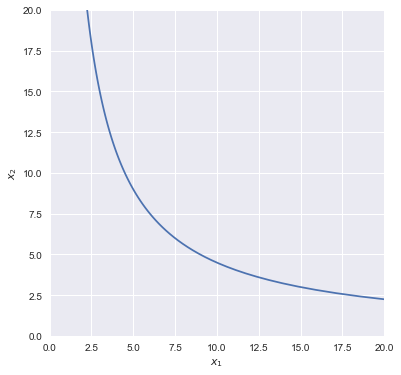

In [53]:
x2_max = 20
x1_vec,x2_vec = find_indifference_curve(y1=15,y2=3,alpha=0.5,N=100,x2_max=x2_max) 

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,x2_vec)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x2_max])
ax.set_ylim([0,x2_max])
ax.grid(True)

<a id="A-classy-solution"></a>

# 8. A classy solution

> **Note:** This section is advanced due to the use of a module with a class. It is, however, a good example of how to structure code for solving and illustrating a model.

**Load module** I have written (consumer_module.py in the same folder as this notebook).

In [54]:
from consumer_module import consumer

## 8.1 Jeppe

Give birth to a consumer called **jeppe**:

In [55]:
jeppe = consumer() # create an instance of the consumer class called jeppe
print(jeppe)

alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000



Solve **jeppe**'s problem.

In [56]:
jeppe.solve()
print(jeppe)

alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 5.00
 x2 = 2.50



## 8.2 Mette

Create a new consumer, called Mette, and solve her problem.

In [57]:
mette = consumer(alpha=0.25)
mette.solve()
mette.find_indifference_curves()
print(mette)

alpha = 0.250
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 2.50
 x2 = 3.75



Make an illustration of Mette's problem and it's solution:

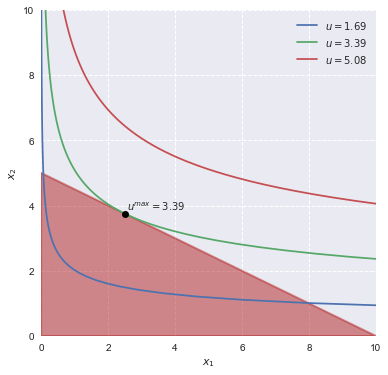

In [58]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

mette.plot_indifference_curves(ax)
mette.plot_budgetset(ax)
mette.plot_solution(ax)
mette.plot_details(ax)

<a id="Summary"></a>

# 9. Summary

**This lecture:** We have talked about:

1. Numpy (view vs. copy, indexing, broadcasting, functions, methods)
2. Print (to screen and file)
3. Figures (matplotlib)
4. Optimization (using loops or scipy.optimize)
5. Advanced: Consumer class

Most economic models contain optimizing agents solving a constrained optimization problem. The tools applied in this lecture is not specific to the consumer problem in anyway.

**Your work:** Before solving Problem Set 1 read through this notebook and play around with the code. To solve the problem set, you only need to modify the code used here slightly.

**Next lecture:** Random numbers and simulation.